<a href="https://colab.research.google.com/github/Mayank-004/Covid-19-/blob/main/Covid19_Death_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 




## Importing the libraries

In [36]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
random.seed(786)


## Importing the dataset







In [37]:
url1 = '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/covid.csv'
dataset = pd.read_csv(url1, error_bad_lines=False)


dataset.head(2)


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97


In [38]:
dataset.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


Filling missing values of Target column MOIC

In [39]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent


In [40]:
dataset['death'] = dataset['date_died'].apply(lambda x: 0 if x == '9999-99-99' else 1)


In [41]:
# drop some unnecessary columns
dataset.drop(columns={"id","patient_type",
                 "entry_date","date_symptoms",
                 "date_died","pregnancy"}, axis=1, inplace=True)

In [42]:
dataset

,sex,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death
0,2,97,2,27,2,2,2,2,2,2,2,2,2,2,2,1,97,0
1,2,97,2,24,2,2,2,2,2,2,2,2,2,2,99,1,97,0
2,1,2,2,54,2,2,2,2,2,2,2,1,2,2,99,1,2,0
3,2,2,1,30,2,2,2,2,2,2,2,2,2,2,99,1,2,0
4,1,2,2,60,1,2,2,2,1,2,1,2,2,2,99,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,97,2,58,1,2,2,2,2,2,2,2,2,2,2,3,97,0
566598,1,97,2,48,2,2,2,2,2,2,2,2,2,2,2,3,97,0
566599,1,2,1,49,2,2,2,2,2,2,2,1,2,2,99,3,2,0
566600,1,97,1,43,2,2,2,2,2,2,2,2,2,2,2,3,97,0


In [43]:
# checking if dataset is balanced or imbalanced
dataset['death'].value_counts(normalize=True)

0    0.936153
1    0.063847
Name: death, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


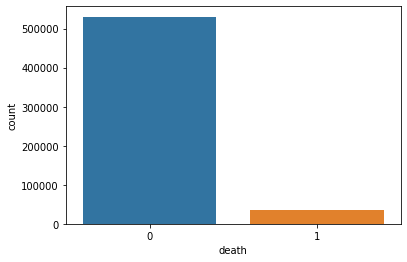

In [44]:
sn.countplot(dataset['death'])


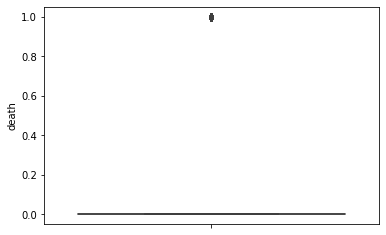

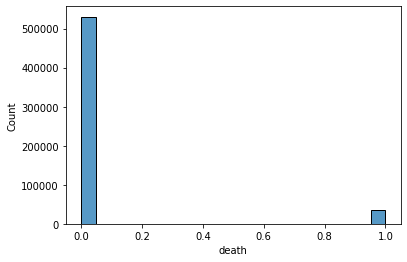

'# check the relationship between MOIC and Primary Industry Sector\nv1 = sn.violinplot(x="Industry Sector", y="MOIC", data=dataset, size=6)\nv1.set_xticklabels(v1.get_xticklabels(),rotation=90)\n\n#Primary Industry Sector can be encoded into 2 types\n\n# check the relationship between MOIC and Current Financing Status\nv2 = sn.violinplot(x="Current Financing Status", y="MOIC", data=dataset, size=6)\nv2.set_xticklabels(v2.get_xticklabels(),rotation=90)\n\n#Current Financing Status can be encoded into 4 types\n\n# check the relationship between MOIC and Current Business Status\nv3 = sn.violinplot(x="Current Business Status", y="MOIC", data=dataset, size=6)\nv3.set_xticklabels(v3.get_xticklabels(),rotation=90)\n\n# Current Business Status can be encoded into 2 types\n\n# check the relationship between MOIC and Universe\nv4 = sn.violinplot(x="Universe", y="MOIC", data=dataset, size=6)\nv4.set_xticklabels(v4.get_xticklabels(),rotation=90)\n\n#Universe can be encoded into 4 types\n\n# check 

In [45]:
# check MOIC's distribution
import seaborn as sn

sn.boxplot(y=dataset["death"])
plt.show()
sn.histplot(dataset, x ='death')
plt.show()




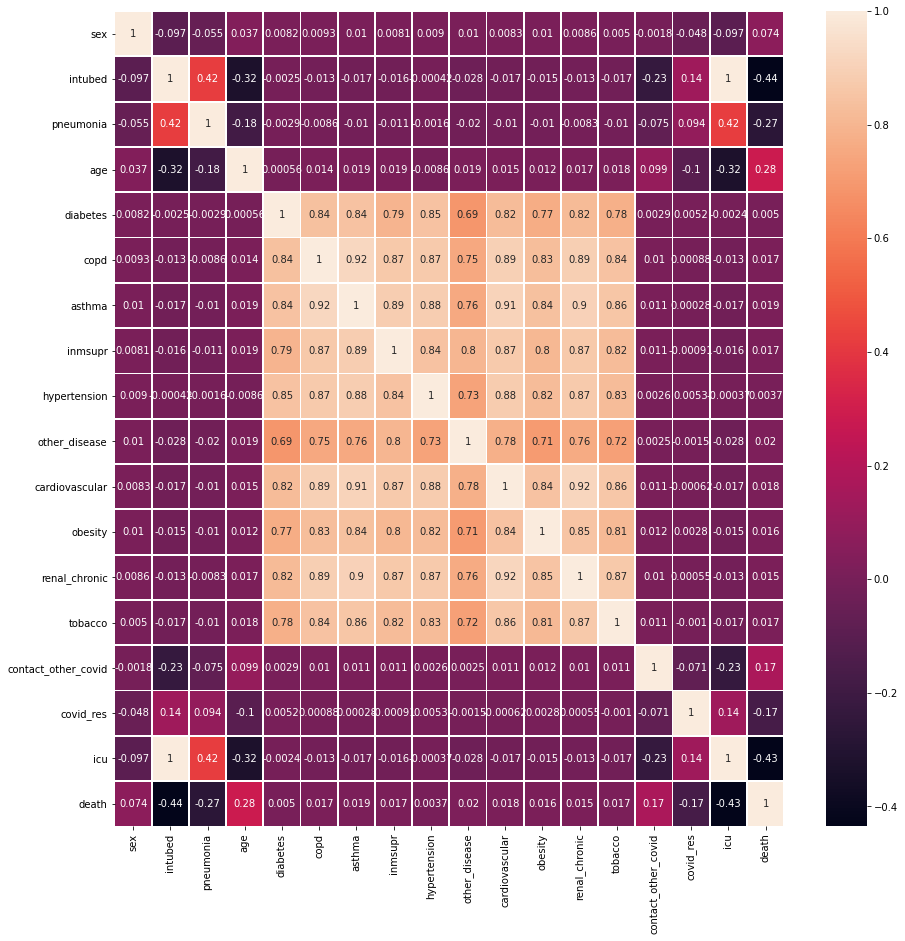

In [46]:
# Correlation Matrix
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [58]:
X = dataset.loc[:,dataset.columns!='death']
Y = dataset['death']


In [59]:
X

,sex,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,97,2,27,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,97,2,24,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,2,54,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,1,30,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,60,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,97,2,58,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,1,97,2,48,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1,2,1,49,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,1,97,1,43,2,2,2,2,2,2,2,2,2,2,2,3,97


In [60]:
Y

0         0
1         0
2         0
3         0
4         1
         ..
566597    0
566598    0
566599    0
566600    0
566601    0
Name: death, Length: 566602, dtype: int64

## Splitting the dataset into the Training set and Test set

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 786, stratify=Y)

In [63]:
y_test

549994    0
544097    0
102805    0
188631    0
480853    0
         ..
494310    0
244210    0
488473    0
301441    0
469307    0
Name: death, Length: 169981, dtype: int64

### Building Models

Defining Function for Model Performance evaluation

In [64]:
# defining a reusable function to evaluate model performance

def eval_result(model_name,y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y_train, y_predtrain)
    print(f'training data accuracy {train_accuracy}')
    train_roc_auc = roc_auc_score(y_train, y_predtrain) 
    print(f' Area under the ROC curve for training data {train_roc_auc}')
    
    test_accuracy = accuracy_score(y_test, y_predtest)
    print(f'testing data accuracy {test_accuracy}')
    test_roc_auc = roc_auc_score(y_test, y_predtest) 
    print(f' Area under the ROC curve for testing data {test_roc_auc}')
    
    print(classification_report(y_test,y_predtest,digits=5))
    plot_confusion_matrix(model_name, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model_name, X_test, y_test)
  

Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=400,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

0.9414


Predicting result

In [69]:
y_predtest_rf= rf.predict(X_test)

y_predtrain_rf = rf.predict(X_train)


evaluating model performance

training data accuracy 0.9570219428623296
 Area under the ROC curve for training data 0.733912271148215
testing data accuracy 0.9425406368947118
 Area under the ROC curve for testing data 0.668814264279066
              precision    recall  f1-score   support

           0    0.95715   0.98261   0.96971    159128
           1    0.58202   0.35502   0.44102     10853

    accuracy                        0.94254    169981
   macro avg    0.76959   0.66881   0.70537    169981
weighted avg    0.93320   0.94254   0.93596    169981



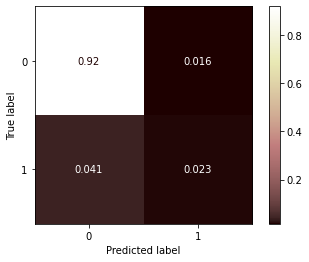

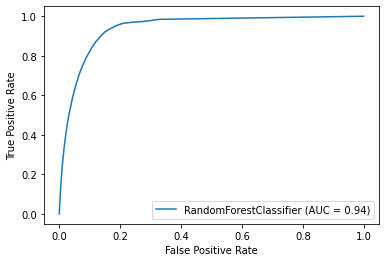

In [70]:
eval_result(rf,y_train,y_predtrain_rf,y_test,y_predtest_rf)

In [72]:
# get importance
rf.feature_importances_


array([0.01352789, 0.18282423, 0.1118199 , 0.27583773, 0.02015345,
       0.01099423, 0.00828207, 0.01058627, 0.02071646, 0.01414788,
       0.01244461, 0.01828796, 0.01301372, 0.01539102, 0.05328348,
       0.0735605 , 0.14512858])